# V tomto notebooku sa dozviete nieco o tom, ako sa typicke grafy najcastejsie pouzivane pri datovej analyze daju vytvarat v Pythone jednoducho
#### Ktore grafy su tu zahrnute:
- boxplot
- histogram
- scatter plot
- bar chart
- kde plot
- line plot

Pre tieto grafy som takisto tam, kde to ma zmysel, uvadzal ako ich robit aj nad zgrupnutym dataframom.

**Upozornenie** : Casto krat v tychto prikladoch grafov mozno nebudu pomenovane osi, ani nebudu mozno mat grafy ziadny titulny nazov.. pre tento notebook s prikladmi je to v poriadku ale pre vase projekty budeme chciet vidiet spravne oznacovane osi, a kde je to uzitocne tak aj nazvy grafov.

### Na konci notebooku najdete este zopar zaujimavych veci, ktore sa vam mozu pri praci s dataframami / grafmi hodit
- ako zmenit velkost grafu pre seaborn / matplotlib / pandas
- co to je subplot? e.g. vytvaranie viacerych grafov do jedneho velkeho "grafu"
- pripajanie novych hodnot do dataframu (novy stlpec, pridanie riadku, pridanie dalsieho dataframu)
- filtrovanie dataframu

# Potrebne veci na fungovanie notebooku :
- kniznice: matplotlib, numpy, seaborn (idealne verzia 0.9 a vyssie), pandas, scipy
- data : trenovaci dataset titanicu - 'train.csv'

# Uzitocne linky
- [Pewe resource] --> Na pewe resources stranke potom kliknite na link pri zdroji s nazvom ["[ML] Introduction to Exploratory Analysis: Measures, Visualizations and Practical Examples" ](https://www.pewe.sk/datalys/resources/ )
- [Seaborn examples](https://seaborn.pydata.org/examples/index.html)
- [Python Graph Gallery](http://python-graph-gallery.com/)
- [Vizualizacia cez Pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
- [Vytvaranie multi-plot gridov v seaborne](https://seaborn.pydata.org/tutorial/axis_grids.html)

### Warningy/FutureWarningy/Errory
- najcastejsi warning sa v tomto notebooku nachadza takyto : "FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. " --> s tymto si musia poradit [vyvojari kniznice `scipy`](https://stackoverflow.com/questions/52594235/futurewarning-using-a-non-tuple-sequence-for-multidimensional-indexing-is-depre)
- inak vo vseobecnosti ak budete dostavat futurewarningy tam, kde som ich ja nemal, tak je dobre si updatenut danu kniznicu, ktora futurewarning vygenerovala
- ine druhy warningov sa mozu vyskytnut (nemali by prilis casto) a netreba ich velmi riesit
- ak v kode nastane nejaky error tak zvycajne je to umysel a niekde na to upozornujem ze taky kod nebude fungovat. Ak dostavate error tam kde predtym nebol, tak je mozne ze si potrebujete updatenut danu kniznicu na novsiu verziu.

In [1]:
# Importy kniznic ktore budeme pouzivat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # matplotlib = zakladna kniznica na vytvaranie grafov
import seaborn as sns 
# seaborn = nadstavba nad matplotlib; je to viac high-level kniznica, robi casto krajsie grafy, ale ked ju pouzijete
# tak obvykle stracate detailnu kontrolu nad tymto grafom. Pri pouziti cisteho matplotlib je jednoduchsie si upravit
# niektore velmi specificke detaily.
%matplotlib inline 
# aby sa nam grafy v jupyter notebooku zobrazovali hned pri outpute = nemusime tym padom za prikazom
# na vytvorenie grafu volat prikaz plt.show()

In [2]:
sns.set() # aby sa nam na vsetky grafy aplikoval trochu lepsie vyzerajuci seaborn styl

### Este poznamka : v pythone sa daju priradit hodnoty viacerym prvkom naraz v jednom riadku --> teda `pes, macka = 10, 20` nam priradi hodnotu 10 do `pes` a 20 do `macka`

In [16]:
pes,macka = 10, 20
print ("Pes:",pes,"Macka:",macka)

Pes: 10 Macka: 20


# Najskor potrebujeme data, ktore mozeme dalej vizualizovat

### Vytvorime si fake data s normalnym rozdelenim

In [3]:
a=np.random.normal(150,20,200)
b=np.random.normal(120,20,200)
stringy=np.random.choice(['a','b','c'],size=200) # plus nejake stringy ktore mozu sluzit ako kategorie pre data

Tuto si zadefinujem nejake funkcie len na to aby som vytvoril zaujimavejsie data. Vsimnite si ze ak chcem do tychto funkcii poslat ako argument cele pole, tak musi byt typu `np.ndarray` a nie zakladny pythonovsky typ `list` -- je to preto lebo nasobenie robi s klasickym typom `list` nieco ine ako by sme momentalne chceli.

In [4]:
# na vytvorenie tychto jednoduchych funkcii vyuzijem anonymnu funkciu (lambda)
# lebo definovat tieto funkcie klasickym sposobom nie je pre nase ucely potrebne

f_1=lambda x: 3*x + 165 # linearna funkcia
f_2=lambda x: x**2 + 10*x + 53 # kvadraticka funkcia
f_3=lambda x: 20*x**3 + 10*x + 78 # kubicka funkcia
f_4=lambda x: x**5 + x**4 + 10 # polynomicka funkcia piateho stupna
# tieto funkcie som si vymyslal nahodne takze nehladajte za tym nieco viac, ale chcem aby ste si vedeli
# predstavit ze aj realnych datach sa mozu nachadzat podobne vztahy (ake opisuju aj tieto funkcie)

In [5]:
c=f_1(np.arange(-100,100))
d=f_2(np.arange(-100,100))
e=f_3(np.arange(-100,100))
f=f_4(np.arange(-100,100))

In [6]:
# dame si data do pythonovskeho datoveho typu `dict` (dictionary) co je vlastne ekvivalent hashmapy
# je to vlastne nezoradena kolekcia "kluc:hodnota" prvkov, kde teda ku kazdemu klucu je asociovana nejaka hodnota
data_dict={"normal_1":a,"normal_2":b,"linearna":c,"kvadraticka":d,"kubicka":e,"polynom":f,"stringy":stringy}
data=pd.DataFrame.from_dict(data_dict)

In [7]:
# usporiadame si stlpce v dataframe ako chceme
data=data.reindex(['normal_1','normal_2',"linearna","kvadraticka","kubicka","polynom","stringy"], axis=1)

### Taktiez si nacitame Titanic dataset

In [8]:
titanic = pd.read_csv("train.csv")

In [9]:
data.head(5)

,normal_1,normal_2,linearna,kvadraticka,kubicka,polynom,stringy
0,163.418037,121.316290,-135,9053,-20000922,-1310065398,c
1,112.795295,114.888363,-132,8864,-19406892,-823906296,a
2,204.815541,115.686223,-129,8677,-18824742,-357036550,b
3,201.583507,119.596922,-126,8492,-18254352,91123626,b
4,148.851168,122.693163,-123,8309,-17695602,521142282,b


In [10]:
# pre malu predstavu o tom ake data sme vytvorili
data.describe()

,normal_1,normal_2,linearna,kvadraticka,kubicka,polynom
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02
mean,149.873129,119.428229,163.500000,3381.500000,-9.992700e+04,1.295302e+07
std,21.171073,20.946147,173.637554,3033.774876,7.579452e+06,8.434525e+08
min,101.415989,70.177662,-135.000000,28.000000,-2.000092e+07,-2.045974e+09
25%,134.886078,103.887679,14.250000,653.000000,-2.538680e+06,-2.307229e+08
50%,147.372066,118.709157,163.500000,2528.000000,6.300000e+01,1.100000e+01
75%,164.092013,134.371994,312.750000,5653.000000,2.390306e+06,2.163865e+08
max,208.377854,180.238039,462.000000,10844.000000,1.940705e+07,2.105947e+09


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
normal_1       200 non-null float64
normal_2       200 non-null float64
linearna       200 non-null int32
kvadraticka    200 non-null int32
kubicka        200 non-null int32
polynom        200 non-null int32
stringy        200 non-null object
dtypes: float64(2), int32(4), object(1)
memory usage: 7.9+ KB


# A teraz uz k samotnym grafom

### Predslov: 
`Matplotlib` nema velmi uzasnu dokumentaciu, obcas su tam veci popisane tazkopadne. 
`Seaborn` je v tomto lepsi, a daju sa tam vytvarat krajsie grafy, pripadne aj nejake exotickejsie grafy. Je to ale stale za cenu straty nejakeho mnozstva kontroly nad grafom. V samotnej dokumentacii `seabornu` mozete najst vetu kde hovoria, ze ich API je robena tak, aby pomohla spravit "dobre zadefinovanu mnozinu tazkych veci jednoducho" ("make a well-defined set of hard things easy"). Ked ale niektore vase potreby nebudu spadat do tejto zadefinovanej mnoziny tazkych veci, niekedy zistite ze je ovela jednoduchsie sa vratit k `matplotlibu`.

#### Ake priklady uvidite na jednotlive grafy
- (cisto) v kniznici `matplotlib`
- (cisto) v kniznici `seaborn`
- volanim funkcii nad pandas objektom (ci uz to bude nad typom `DataFrame` alebo `Series`)
    - **pandas objekty zvycajne vyuzivaju `matplotlib` funkcie na vytvaranie grafov **

Vsetky tieto pristupy vytvarania grafov su uplne legitimne, akurat niekedy moze byt jeden pristup pracnejsi ako druhy.
Niekedy vam k funkciam dam aj odkazy na ich dokumentaciu aby ste si vedeli potom vyskusat aj sa pohrat s parametrami tychto grafov.

---

## Boxplot

### Matplotlib

{'boxes': [<matplotlib.lines.Line2D at 0x1b3bdedd4e0>],
 'caps': [<matplotlib.lines.Line2D at 0x1b3bdeddd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b3bdef1828>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1b3bdef14a8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1b3bdedd668>,
  <matplotlib.lines.Line2D at 0x1b3bdedd9e8>]}

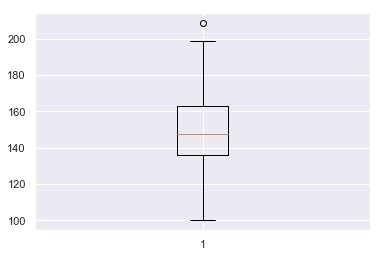

In [14]:
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.boxplot(a) # tato funkcia akceptuje ako argument jedno 1D pole cisiel

### Seaborn

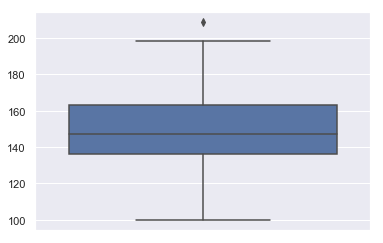

In [15]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# pre boxplot nad jednym polom robi defaultne seaborn horizontalny boxplot. my chceme idealne vertikalny
sns.boxplot(a,orient='v') 

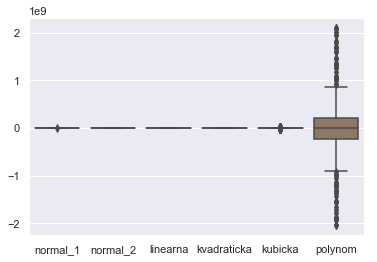

In [16]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
# pri seaborne vieme jednoducho spravit boxplot aj z dataframu (tabulka s viacerymi stlpcami)
# ine ako numericke stlpce by mal seaborn ignorovat
sns.boxplot(data=data,orient='v')

Lahko sa vam pri zobrazeni boxplotu viacerych atributov moze stat ze kvoli tomu, ze napriklad jeden stlpec obsahuje velmi velke hodnoty oproti ostatnym (stlpec 'polynom'), tak potom nie je dobre vidiet boxploty k ostatnym stlpcom.

### Pandas

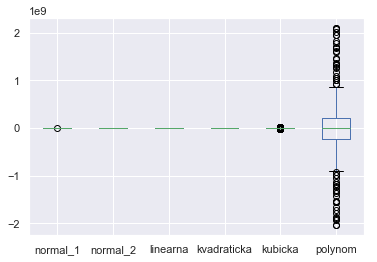

In [17]:
data.boxplot() # spravi boxplot nad vsetkymi numerickymi stlpcami

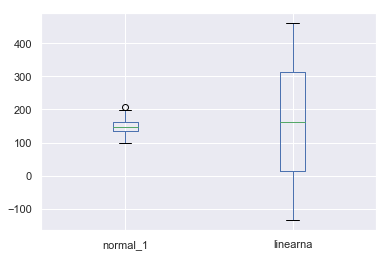

In [18]:
# vyselektovane 2 stlpce z dataframu a vytvoreny boxplot
data[["normal_1","linearna"]].boxplot()

**!!! POZOR !!!** 

Ked si vyselectujete z dataframu iba jeden stlpec, vrati vam to objekt `pandas.Series` a nie `pandas.DataFrame`

Objekt `pandas.Series` neobsahuje rovnake funkcie, ktore ma `pandas.DataFrame`

In [19]:
type(data["linearna"])

pandas.core.series.Series

In [20]:
type(data)

pandas.core.frame.DataFrame

In [21]:
# taketo volanie nad objektom Series nepojde
data["linearna"].boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

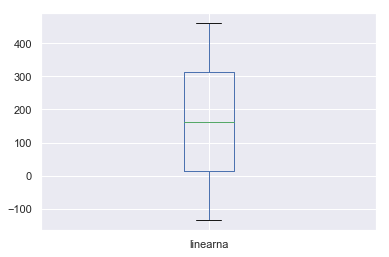

In [22]:
data["linearna"].plot(kind='box') # alebo ekvivalentne volanie: data["linearna"].plot.box()

### Pre zistenie, ake vsetky grafy mozete vytvarat nad objektom `Series` odporucam pozriet [tento link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

### Casto mozno budete chciet vytvarat grafy aj nad zgrupnutymi datami 

stringy
a    AxesSubplot(0.125,0.125;0.775x0.755)
b    AxesSubplot(0.125,0.125;0.775x0.755)
c    AxesSubplot(0.125,0.125;0.775x0.755)
Name: kvadraticka, dtype: object

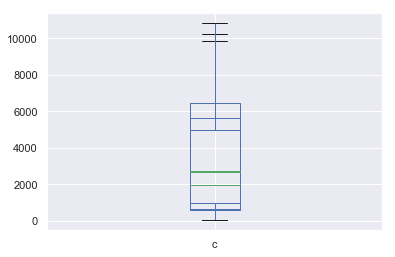

In [23]:
data.groupby('stringy')['kvadraticka'].plot.box()

Ale z takehoto grafu, kde mame tri boxploty na sebe v jednom grafe asi vela nevycitame.

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


a         AxesSubplot(0.1,0.559091;0.363636x0.340909)
b    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
c             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

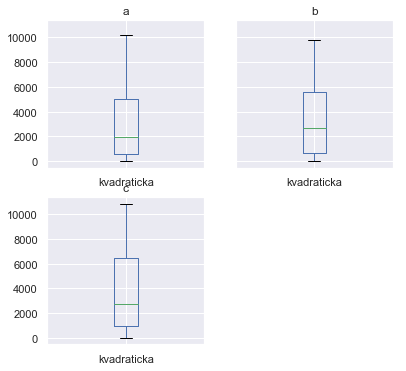

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
data.groupby('stringy').boxplot(column='kvadraticka',ax=ax) # vygeneruje tri oddelene grafy

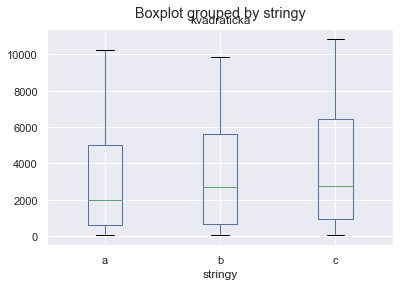

In [25]:
data.boxplot(column='kvadraticka', by='stringy') # vygeneruje jeden graf s tromi oddelenymi boxplotmi

#### Zobrazenie zgrupnutych dat cez `seaborn`

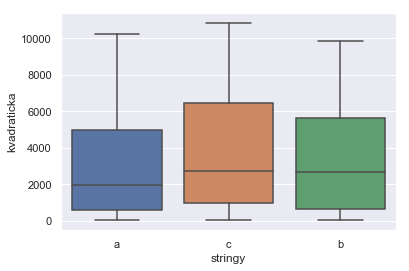

In [26]:
sns.boxplot(x='stringy',y='kvadraticka',data=data)

#### Zgrupovanie nad dvomi stlpcami

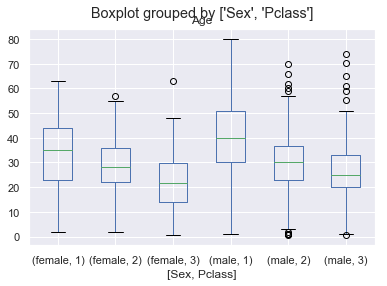

In [27]:
titanic.boxplot(column="Age",by=["Sex","Pclass"]) # parameter `by` pri tejto funkcii funguje ako groupby

V podstate to iste cez `seaborn`. Az na to ze keby som chcel zgrupovat data podla 3 stlpcov namiesto len 2, tak cez `seaborn boxplot` to uz tak jednoducho spravit nepojde.

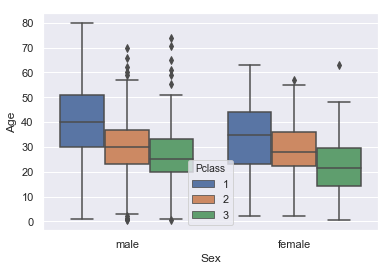

In [28]:
sns.boxplot(x="Sex",y="Age",hue="Pclass",data=titanic) # seaborn boxplot spravi implicitne groupby nad datami

### BONUS (advanced): Zatial sme mohli `seaborn boxplot` pouzivat velmi jednoducho lebo aj nas groupby bol este relativne jednoduchy. Co ak budeme chciet zgrupnut podla 3 stlpcov ? 

Plotovanie grafov cez samotny pandas dataframe funguje celkom pekne

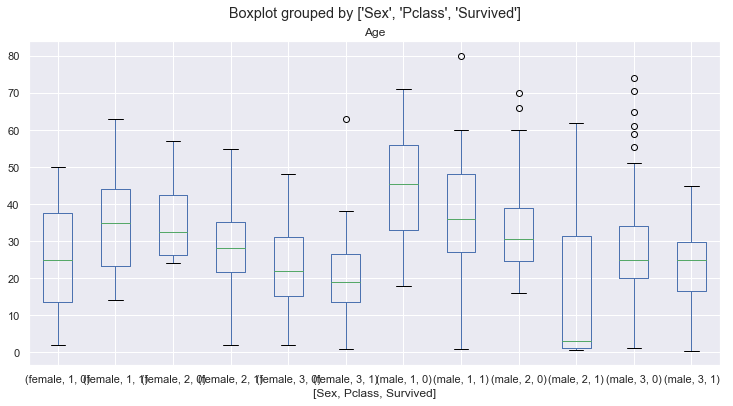

In [29]:
fig, ax = plt.subplots(figsize=(12,6)) # tento riadok je tu len na to aby som mohol grafu nastavit velkost (cez ax)
titanic.boxplot(column="Age",by=["Sex","Pclass","Survived"],ax=ax)

Seaborn vsak velmi nerata s tym ze by sme pomocou neho chceli robit nejaky zlozity groupby. V seaborne len specifikujeme ake data chceme pouzit na ktorej osi (os x,y, a hue -- hue nie je realna os ale odlisuje prvky roznou farbou).

Pre seaborn budeme musiet pouzit trochu viacej magie.

In [30]:
# najskor spravime groupby nad tromi stlpcami
grouped=titanic.groupby(["Sex","Pclass","Survived"])

In [31]:
# groupby obsahuje pre jednotlive groupy iba index riadku, a nie jednotlive hodnoty stlpcov/stlpca, ktore by sme
# mohli chciet (v nasom pripade chceme hodnoty stlpca 'Age'). Preto si tie data musime z dataframu vytiahnut.
temp_values=[]
for val in grouped.groups.values():
    temp_values.append(titanic.iloc[val]["Age"].values) # tuto filtrujeme dataframe podla indexu riadku a berieme
    # data zo stlpca "Age"

In [32]:
# nasledne vytvorime tzv. "wide form dataframe".. pri zlozitejsich veciach, ako robime teraz (zlozitejsi groupby) 
# zvycajne potrebujeme dostat data do takejto podoby alebo do "long form dataframe" formy
new_df=pd.DataFrame(temp_values).T
new_df.columns = grouped.groups.keys()

Pre viac info k tomu v akej forme akceptuje `sns.boxplot` data, pozrite [tento link](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

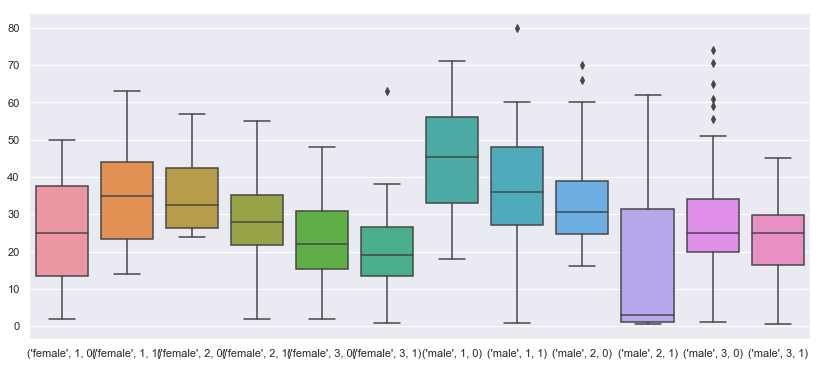

In [34]:
fig,ax=plt.subplots(figsize=(14,6)) # tento riadok je tu len na to aby som mohol seaborn grafu nastavit velkost (cez ax)
sns.boxplot(data=new_df,ax=ax)

Ako bolo hovorene na prednaske, velmi farebne grafy nemusia byt vzdy dobre. Tuto farba boxplotu nehovori ziadnu zmysluplnu informaciu. Preto by bolo lepsie pouzit pre kazdy boxplot jednu farbu, resp. spravit boxploty napriklad ciernobiele. Nastavovanie farieb pre grafy uz nechavam pre vas na dostudovanie, ak to budete potrebovat.

---

# Histogram

## Matplotlib

[Dokumentacia k plt.hist funkcii](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)

Odporucane parametre na vyskusanie :
- `bins` : pocet "kosov" do ktorych budeme kategorizovat cisla z nasej distribucie
- `histtype` : vdaka nemu sa daju robit celkom zaujimave histogramy
- `density` : zobrazi na y-ovej osi hustotu a nie absolutny pocet (normalizuje absolutny pocet)
- `log` : pre zmenenie skaly histogramu na logaritmicku
- `stacked` : v niektorych situaciach moze byt vhodne pouzit (vacsinou ale skor nie)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

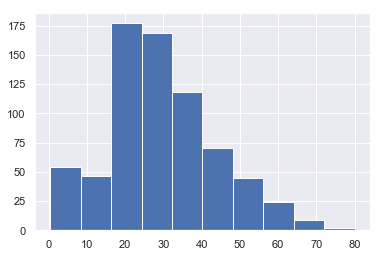

In [12]:
plt.hist(titanic['Age'].dropna(),bins=10)

## Seaborn

Na histogramy v `seaborne` sa pouziva [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html). Tento graf spaja typicky histogram s tzv. 'kde' (kernel density estimate) krivkou. Ak chceme niektory typ grafu z tohto mixu grafov vypnut, pouzivame na to parametre `hist` a `kde`.

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


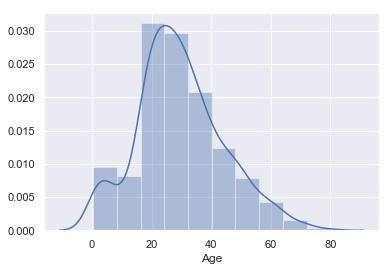

In [13]:
sns.distplot(titanic[('Age')].dropna(),bins=10)

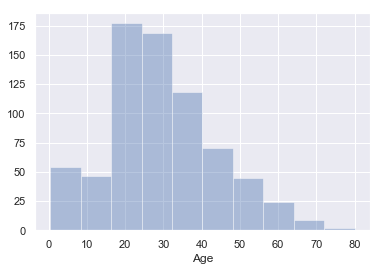

In [45]:
sns.distplot(titanic['Age'].dropna(),kde=False,bins=10)

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


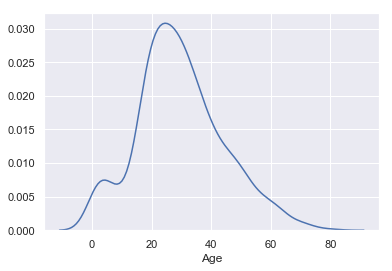

In [46]:
sns.distplot(titanic['Age'].dropna(),hist=False,bins=10)

## Pandas

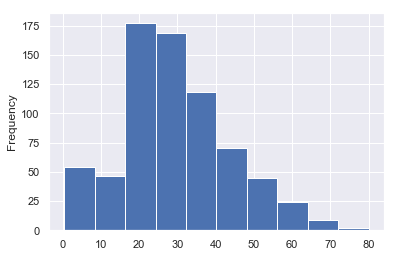

In [47]:
titanic['Age'].plot.hist(bins=10)

## Robenie histogramov pre zgrupnute data

## Pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3C0610898>,
      dtype=object)

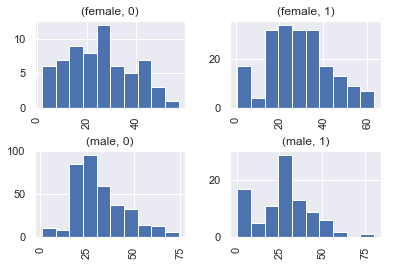

In [48]:
titanic.hist(column="Age",by=["Sex","Survived"])

Pri tomto grafe stoji za povsimnutie ze sice stlpce histogramov obcas maju velmi podobnu velkost, ale ked sa pozriete na ypsilonovu os tak casto krat je uplne inak naskalovana. Taktiez x-ova os tu nie je rovnaka. Toto si treba uvedomovat ak chcete robit nejake zavery o distribuciach atributov.

## Seaborn

Pri seaborn kniznici sa casto krat stava ze je potrebne si svoje data dat do "lepsieho tvaru" s ktorym bude seaborn spokojny.
Zvycajne sa odporuca pouzit tzv. "long form dataframe", ktory sa vyraba cez funkciu `pd.melt`. 

Funkcia `pd.melt` zoberie nas dataframe a (defaultne) skonvertuje takyto dataframe do formy kde mame iba dva stlpce:
- variable : v tomto stlpci sa nam budu nachadzat nazvy vsetkych nasich stlpcov z povodneho dataframu
- value : tu sa budu nachadzat prislusne hodnoty, ktore boli v danych stlpcoch

In [49]:
# iba pre ukazku
pd.melt(titanic).variable.value_counts()

PassengerId    891
Fare           891
Ticket         891
SibSp          891
Cabin          891
Pclass         891
Parch          891
Survived       891
Sex            891
Embarked       891
Name           891
Age            891
Name: variable, dtype: int64

In [50]:
# v tomto pripade posleme nazvy nasich stlpcov, podla ktorych sme zgrupovali, do parametra `id_vars`
# a hodnotu, ktoru sme chceli zobrazovat, posleme do `value_vars`
long_form_df=pd.melt(titanic, id_vars=['Sex','Survived'],value_vars=['Age'])
long_form_df.head(5)

,Sex,Survived,variable,value
0,male,0,Age,22.0
1,female,1,Age,38.0
2,female,1,Age,26.0
3,female,1,Age,35.0
4,male,0,Age,35.0


`FacetGrid` ulahcuje vytvaranie viacerych grafov podla nejakych skupin (v nasom pripade Sex a Survived).
Urcime si aky atribut chceme mat v riadkoch (`row`) a aky v stlpcoch (`col`). Nasledne vytvoreny grid namapujeme na funkciu, ktoru chceme pouzit (`distplot`).

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


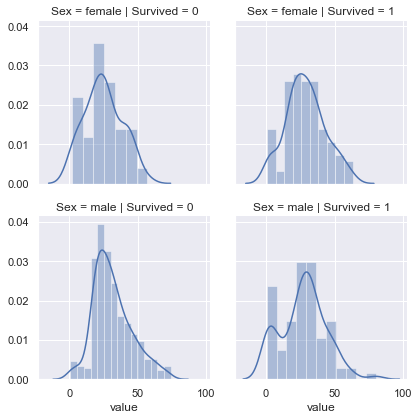

In [51]:
g = sns.FacetGrid(long_form_df, row='Sex',col='Survived',
                  row_order=['female','male'])
g.map(sns.distplot, 'value') # tuto by sme mohli ako parameter poslat kludne aj nejaku funkciu z matplotlib kniznice,
# napriklad plt.hist

---

# Scatter plot

Zvycajne ho pouzivame na zobrazenie zavislosti dvoch atributov. Pomocou farby a velkosti bodiek dokazeme zobrazit vztah s dalsimi dvomi dodatocnymi atributmi.

## Matplotlib

[Dokumentacia k plt.scatter](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)

Odporucane parametre na vyskusanie : 
- c : ofarbenie jednotlivych bodov
- s : nastavenie velkosti bodov
- marker : nastavenie typu markera; nemusi to byt len taka typicka bodka ale aj vselico ine

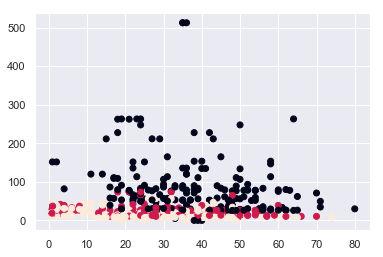

In [52]:
# zobrazenie zavislosti ceny listka od veku + ofarbenie podla triedy pasaziera
plt.scatter(titanic.Age,titanic.Fare,c=titanic.Pclass)

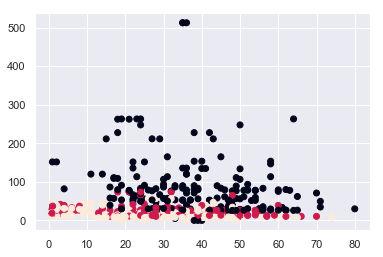

In [53]:
# jednotlive atributy ktorych vztah chceme zobrazit mozme specifikovat aj cez nazvy stlpcov a nastavenim parametra `data`
plt.scatter(x='Age',y='Fare',c='Pclass',data=titanic)

## Seaborn

`Seaborn` ponuka pri funkcii `scatterplot` aj ine odlisenie dimenzie ako farbou a velkostou markeru. Dokaze odlisovat dimenzie pomocou stylu markeru (kruh, stvorec, krizik etc.).

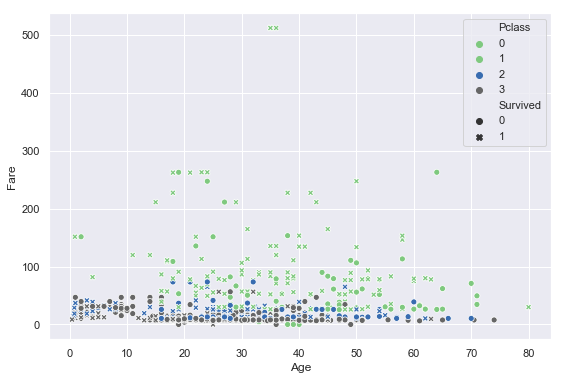

In [54]:
# pri starsich verziach seabornu ako 0.9 vam tento prikaz nemusi fungovat.. odporucam teda mat najnovsi seaborn :)
fig,ax=plt.subplots(figsize=(9,6))
sns.scatterplot(x="Age", y="Fare", hue="Pclass",style="Survived", data=titanic, palette="Accent",ax=ax)

Seaborn ma aj funkciu `pairplot` ktora nam vytvori vsetky mozne (zmysluplne) kombinacie atributov. Na diagonale je kombinacia atributu sameho so sebou takze tam nema zmysel zobrazovat scatterplot a namiesto neho tam byva zvycajne histogram.

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encounte

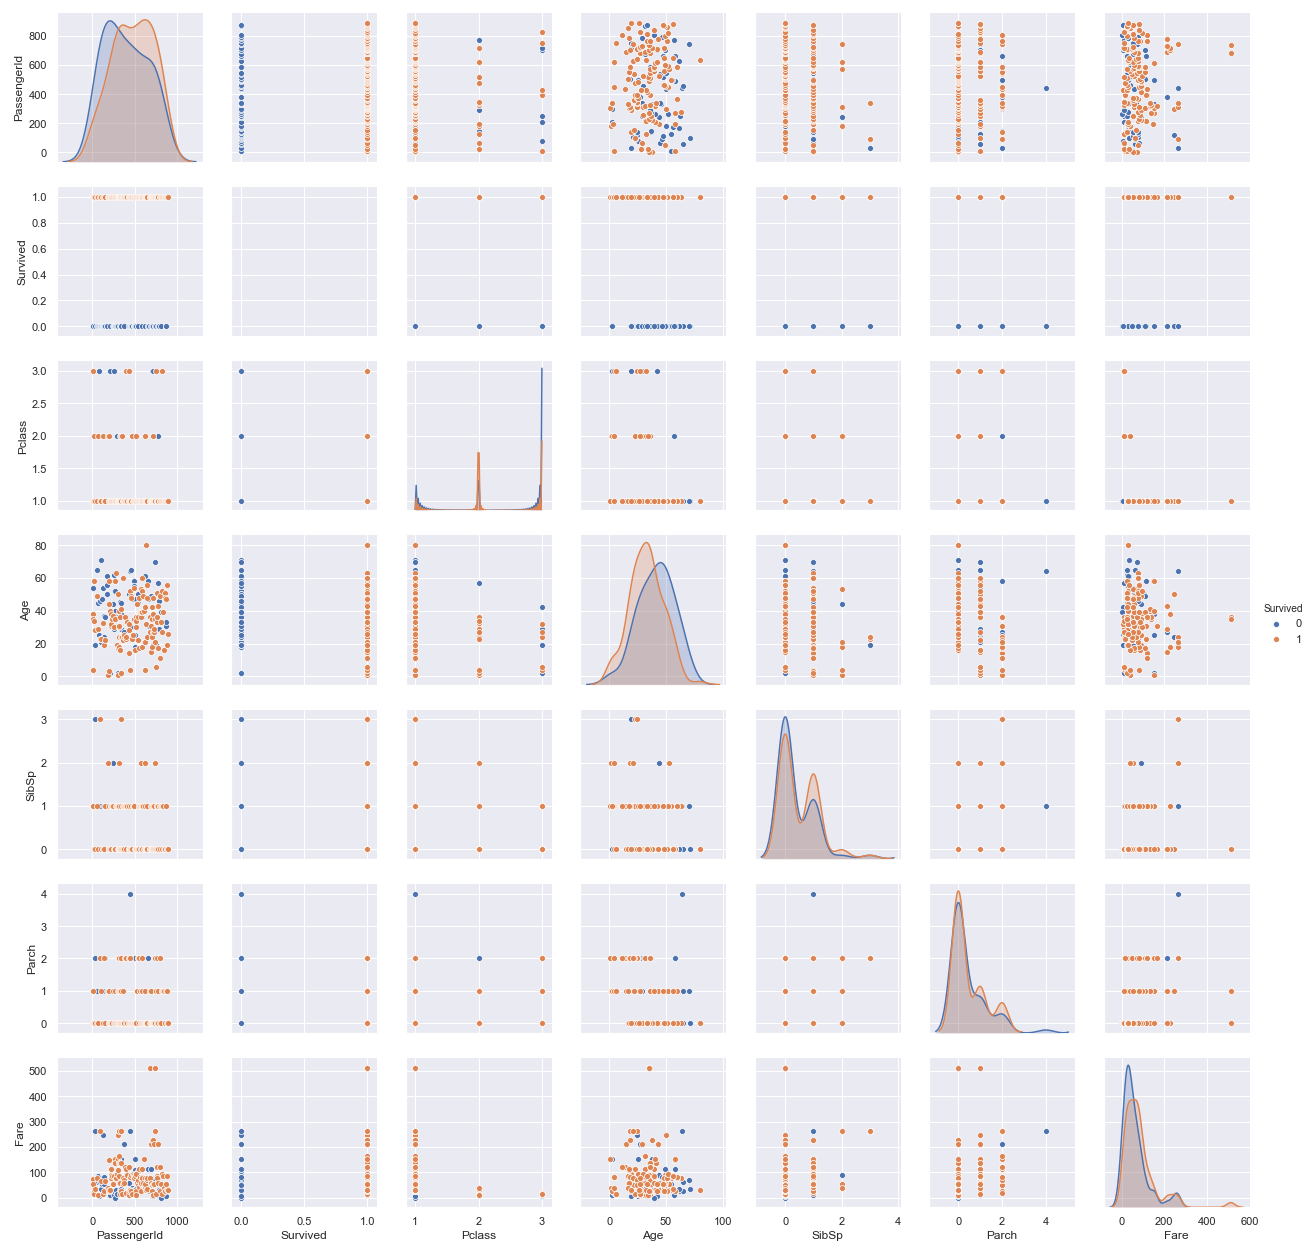

In [55]:
sns.pairplot(titanic.dropna(),hue="Survived") # mozeme si scatterplot ofarbit, napriklad podla toho, kto prezil

## Pandas

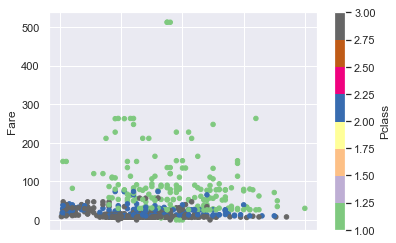

In [57]:
titanic.plot.scatter(x='Age',y='Fare',c='Pclass',cmap='Accent')

#### Co sa tyka scatter plotu, jeho pouzivanie nad zgrupenymi datami nie je az take obvykle (napriklad preto lebo ked mame v dataframe vela pozorovani tak sa nemusi dat spravne rozpoznat pomer medzi triedami a moze to byt celkom zavadzajuce), ale necham tu jeden taky priklad v `seaborne`.

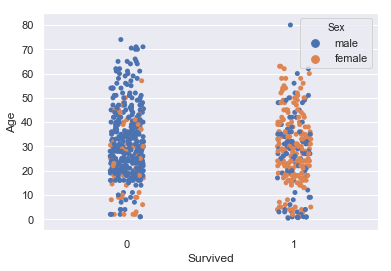

In [58]:
sns.stripplot(x="Survived", y="Age",hue="Sex", data=titanic)

### Grafy v seaborne co tiez robia scatterplot ale nieco tam pridavaju

Seaborn ma zakladnejsi typ grafu `regplot`. Tento graf potom kombinuje roznymi sposobmi do inych grafov (zvycajne v kombinacii s nejakym typom gridu):
- `Lmplot` = `regplot` + `FacetGrid`
- `Pairplot` = `regplot` + `PairGrid` (tento sme si uz ukazovali, vykresli vsetky rozumne kombinacie atributov)
- `Jointplot` = `regplot` + `JointGrid`

`Regplot` sa nauci nad datami linearnu regresiu a taktiez vykresli interval 95% istoty (95% confidence interval).

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


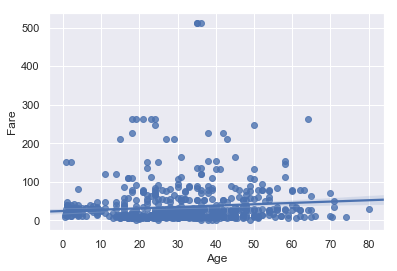

In [59]:
sns.regplot(x="Age",y="Fare",data=titanic)

`Lmplot` ponuka moznost ofarbenia podla stlpca a rozdelenie na viacero grafov podla dalsieho stlpca.

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


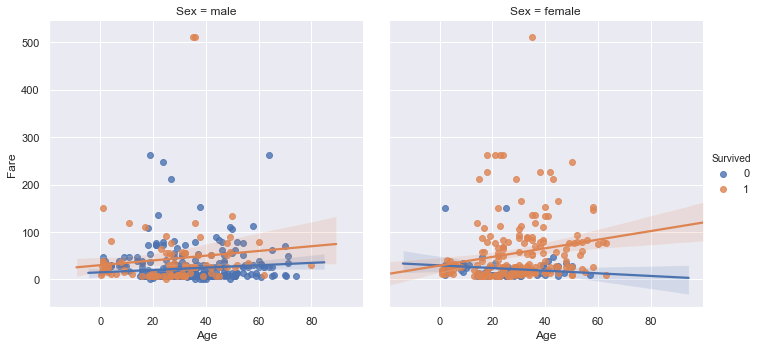

In [60]:
sns.lmplot(x="Age",y="Fare",data=titanic,hue="Survived",col="Sex") # este dalsia dimenzia sa da vizualizovat pomocou `row`

Pri `jointplote` davam do pozornosti parameter `kind`. Mozete vdaka tomu robit aj ine grafy nez len `scatter`. Napriklad aj kde alebo regresne. 

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


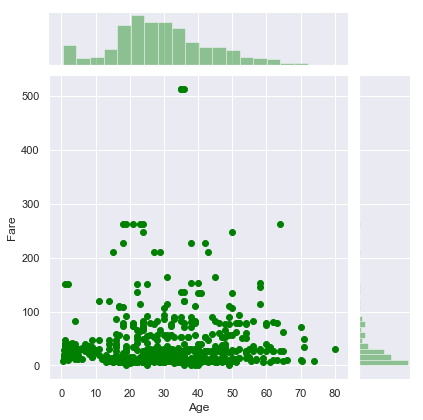

In [61]:
sns.jointplot(x="Age",y="Fare",data=titanic,kind='scatter',color='green')

---

# Bar chart

Tento typ grafu je idealny na zobrazovanie poctov (alebo pomerov poctov) ked si nieco zgrupujeme/agregujeme.

## Matplotlib

<BarContainer object of 3 artists>

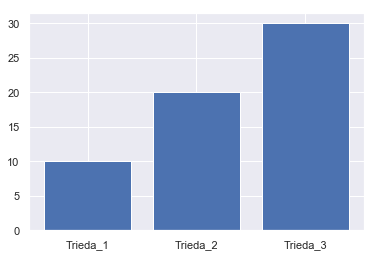

In [62]:
# jednoducha ukazka
plt.bar(x=['Trieda_1','Trieda_2','Trieda_3'],height=[10,20,30])

## Pandas

Robenie bar chartov ma ovela vacsi zmysel pri nejakom zgrupovani dat. Preto najvacsiu pozornost venujem `pandas`.

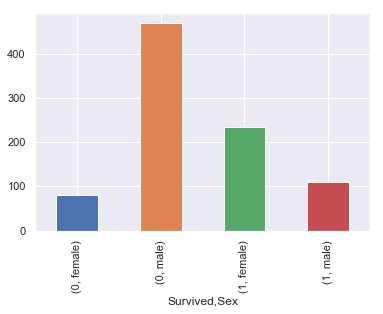

In [63]:
# pocty prezitych a mrtvych rozdelene podla pohlavia, jeden zo stlpcov by v tomto pripade bolo lepsie reprezentovat farbou 
titanic.groupby(["Survived"])['Sex'].value_counts().sort_index().plot.bar()

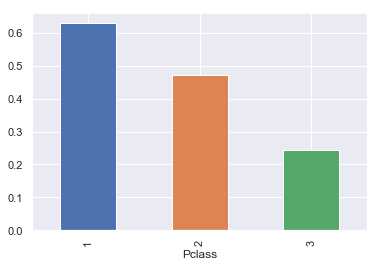

In [64]:
# miera prezitia zgrupnuta v ramci troch druhov Pclass
titanic.groupby(['Pclass'])["Survived"].mean().plot.bar()

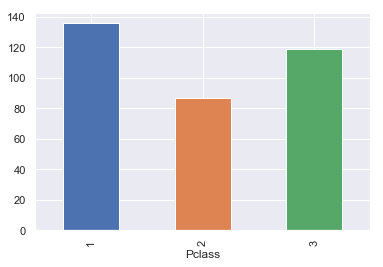

In [65]:
# pocet ludi co prezili , zgrupnuty podla Pclass
# tuto si treba uvedomit ze ten sum nam vracia pocet prezitych ludi iba preto lebo v Survived su len binarne hodnoty (0/1)
# keby tam boli ine hodnoty tak by to takto nefungovalo
titanic.groupby(['Pclass'])["Survived"].sum().plot.bar()

Ajked miera prezitia v Pclass 2 bola vyssia ako v Pclass 3, realne prezilo viac ludi v Pclass 3.

### Co ak si chceme zobrazit pocty prezitych a mrtvych ludi zgrupnutych podla  Pclass?

Groupby nam defaultne da tie stlpce, podla ktorych zgrupujeme, do indexu.

In [66]:
titanic.groupby(['Pclass',"Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [67]:
titanic.groupby(['Pclass',"Survived"]).size().index

MultiIndex(levels=[[1, 2, 3], [0, 1]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['Pclass', 'Survived'])

Vidime, ze nam groupby vytvoril `MultiIndex` z Pclass a Survived.

### Na dosiahnutie toho, co potrebujeme, mozeme pouzit `unstack`. Tato funkcia defaultne zoberie posledny level z `multiindexu` a prehodi ho na stlpce dataframu. Odporucam pozriet si [dokumentaciu](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

In [68]:
titanic.groupby(['Pclass',"Survived"]).size().unstack()

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


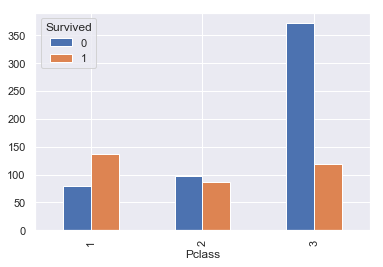

In [69]:
titanic.groupby(['Pclass',"Survived"]).size().unstack().plot.bar()

Z tych co prezili, ake su pomery pohlavi medzi jednotlivymi Pclass?

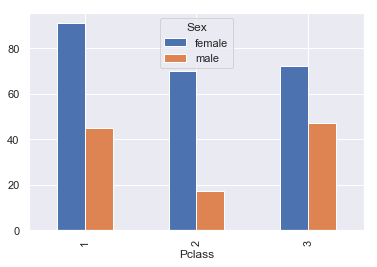

In [70]:
titanic[titanic.Survived == 1].groupby(['Pclass','Sex']).size().unstack().plot.bar()

## Seaborn

Na zobrazenie si kontingencnej tabulky hovoriacej o vztahu pohlavia a prezitia musime znova dostat dataframe do long form tvaru.

In [71]:
sb_df=pd.melt(titanic.groupby(["Survived","Sex"]).size().unstack().reset_index(),id_vars=["Survived"])
sb_df

,Survived,Sex,value
0,0,female,81
1,1,female,233
2,0,male,468
3,1,male,109


Jednoduchy `barplot` robeny cez `seaborn`

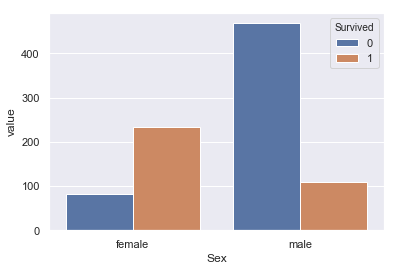

In [72]:
sns.barplot(x="Sex",y="value",hue="Survived",data=sb_df)

Na vizualizaciu viacerych vztahov viacerych premennych v seaborne barplotom mozeme vyuzit `catplot`. Odporucam pozriet si [dokumentaciu](https://seaborn.pydata.org/generated/seaborn.catplot.html) pretoze touto funkciou dokazeme vytvarat aj ine grafy nez len stlpcove. Taktiez odporucam pozriet sa na parameter `estimator` pri tejto funkcii. Dokazeme tym zobrazit rozne veci.

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


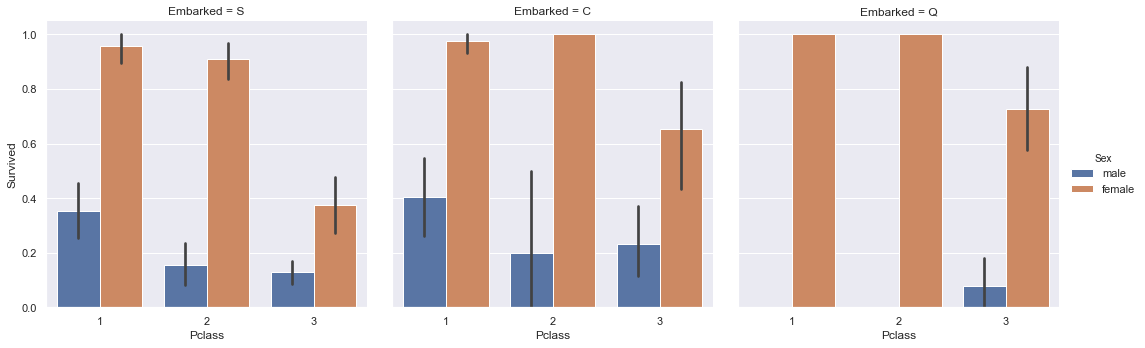

In [73]:
# defaultne pouziva `catplot` estimator np.mean, toto nam da v nasom pripade mieru prezitia v danej skupine
# dolezite je uvedomit si ze estimator bude operovat nad zoznamom/Series/polom ktore priradime do parametra `y`
sns.catplot(x="Pclass", y="Survived",hue="Sex",col="Embarked",data=titanic, kind="bar",estimator=np.mean)

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


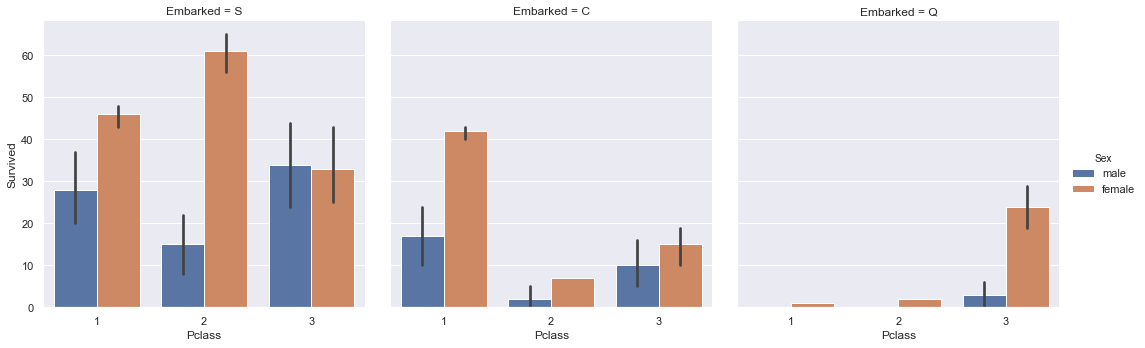

In [74]:
# ked zmenime estimator dokazeme sa napriklad dozvediet absolutny pocet prezitych ludi v danej skupine
sns.catplot(x="Pclass", y="Survived",hue="Sex",col="Embarked",data=titanic, kind="bar",estimator=np.sum)

Ten `estimator` musi byt vlastne agregacna funkcia ktora dokaze spravit z pola prvkov jedno cislo. Pre lepsiu predstavu, ake funkcie sa daju pouzit ako estimator, odporucam vygooglit si agregacne funkcie v kniznici `numpy`. [Tu](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html) su uvedene niektore z nich.

---

# KDE plot (1D,2D)

Tento graf sa nepouziva az tak casto. Sluzi na odhadnutie a vyobrazenie funkcie hustoty pravdepodobnosti.

## Matplotlib

`Matplotlib` neobsahuje priamo grafovu funkciu na vytvorenie kde grafu. Mozeme ju vsak vytvorit s mensou pomocou kniznice `scipy`.

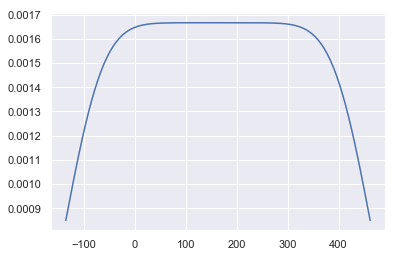

In [75]:
from scipy import stats
density=stats.kde.gaussian_kde(data.linearna)
plt.plot(data.linearna,density(data.linearna))

## Seaborn

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


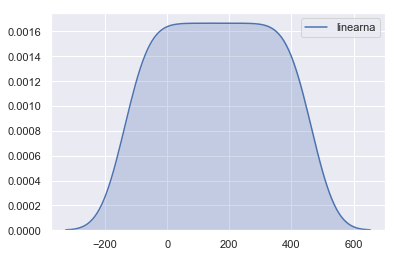

In [76]:
sns.kdeplot(data.linearna,shade=True)

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


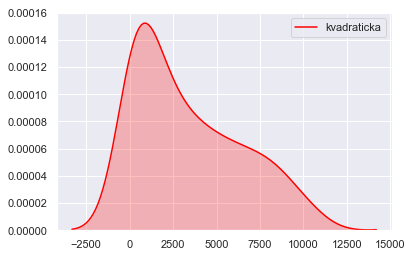

In [77]:
sns.kdeplot(data.kvadraticka,shade=True,color='red')

Ako jediny z tychto balickov dokaze robit aj 2D (zavisly na dvoch premennych) KDE plot  jednoducho.

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


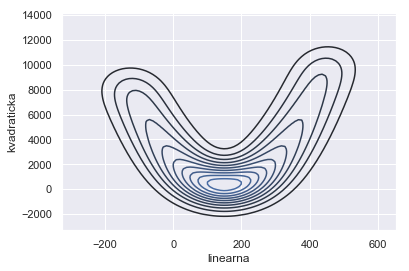

In [78]:
sns.kdeplot(data.linearna,data.kvadraticka)

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


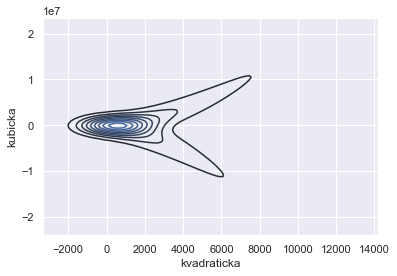

In [79]:
sns.kdeplot(data.kvadraticka,data.kubicka)

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


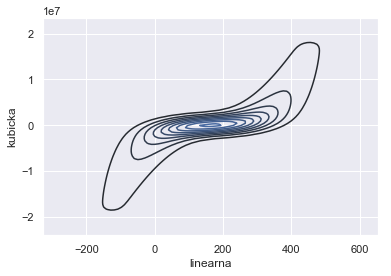

In [80]:
sns.kdeplot(data.linearna,data.kubicka)

## Pandas

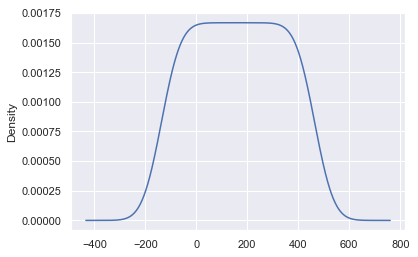

In [81]:
data.linearna.plot.kde()

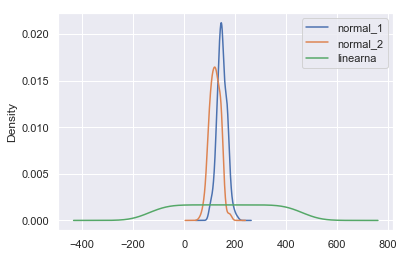

In [82]:
data[["normal_1","normal_2","linearna"]].plot.kde()

---

# Line plot

## Matplotlib

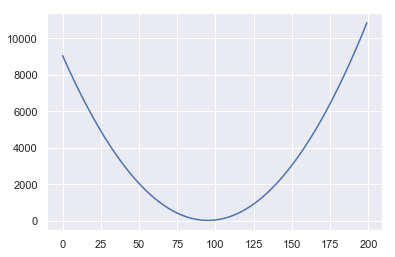

In [83]:
plt.plot(data.kvadraticka)

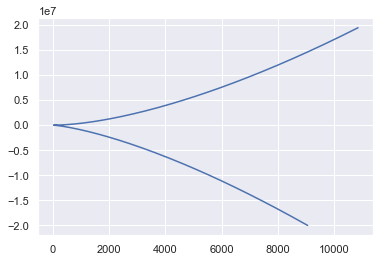

In [84]:
# line plot
plt.plot(data.kvadraticka,data.kubicka)

## Seaborn

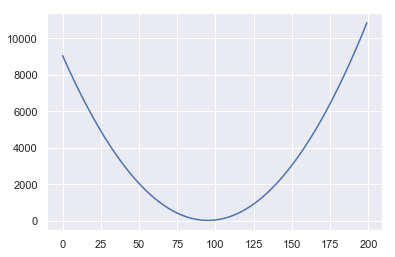

In [85]:
# takto si mozeme zobrazit jeden atribut
sns.lineplot(data=data.kvadraticka)

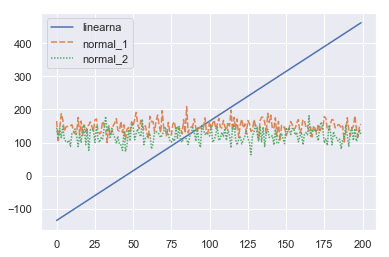

In [86]:
# zobrazenie viacerych atributov do jedneho grafu
sns.lineplot(data=data[["linearna","normal_1","normal_2"]])

C:\Users\matko\AppData\Local\conda\conda\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


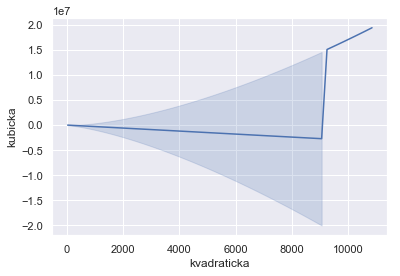

In [87]:
# zobrazenie zavislosti dvoch atributov
sns.lineplot(x=data.kvadraticka,y=data.kubicka)

## Pandas

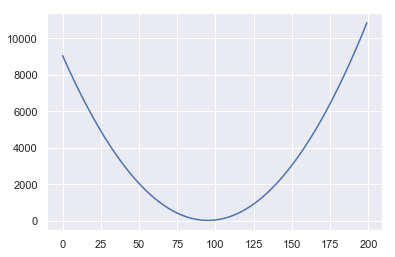

In [88]:
# zobrazenie jedneho atributu
data.kvadraticka.plot()

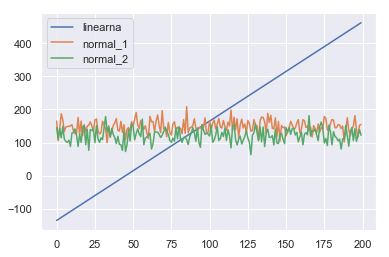

In [89]:
# zobrazenie viacerych atributov do jedneho grafu (ziadne zavislosti)
data[["linearna","normal_1","normal_2"]].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3C74782E8>,
      dtype=object)

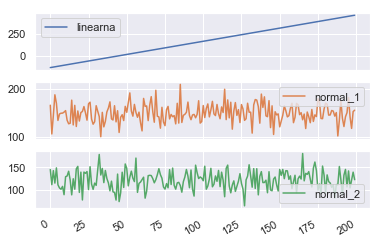

In [90]:
# tri atributy vyobrazene kazdy vo svojom grafe
data[["linearna","normal_1","normal_2"]].plot(subplots=True)

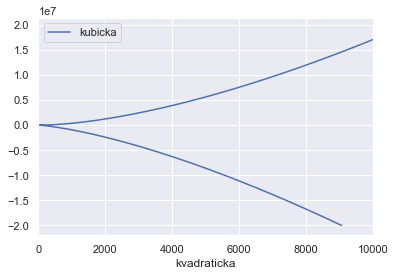

In [91]:
# tu som musel nastavit `xlim` aby to ukazalo o nieco rozumnejsi graf
data.plot.line(x="kvadraticka",y=["kubicka"],xlim=(0,10000))

---

---

# Zopar uzitocnych veci :
- ako zmenit velkost grafu pre seaborn / matplotlib / pandas
- co to je subplot? E.g. vytvaranie viacerych grafov do jedneho velkeho "grafu"
- pripajanie novych hodnot do dataframu (novy stlpec, pridanie riadku, pridanie dalsieho dataframu)
- filtrovanie dataframu

## Zmena velkosti grafu pre seaborn aj matplotlib
Rovnaky sposob bude fungovat aj pre seaborn aj pre pandas.

### Seaborn

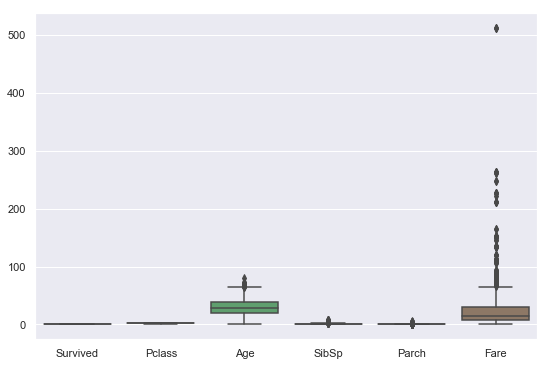

In [92]:
fig, ax = plt.subplots(figsize=(9,6))
sns.boxplot(data=titanic.loc[:,titanic.columns!="PassengerId"],ax=ax)

Avsak niektore grafy seabornu su tzv. "figure-level" a nie "axes-level". Pre taketo grafy sa nebude dat specifikovat parameter `ax`. Vtedy je asi najlepsie pouzit parametre `height` a `aspect` na kontrolu velkosti grafu.

In [93]:
sns.pairplot(titanic.dropna(),ax=ax)

TypeError: pairplot() got an unexpected keyword argument 'ax'

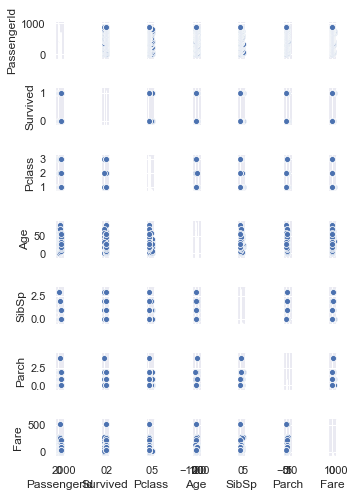

In [94]:
sns.pairplot(titanic.dropna(),height=1,aspect=0.7)

### Pandas

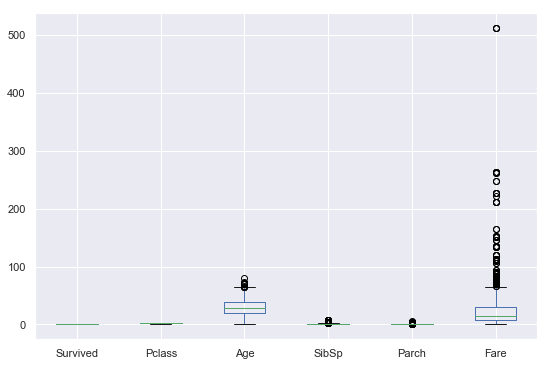

In [95]:
fig, ax = plt.subplots(figsize=(9,6))
titanic.loc[:,titanic.columns!="PassengerId"].plot.box(ax=ax)

### Matplotlib

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

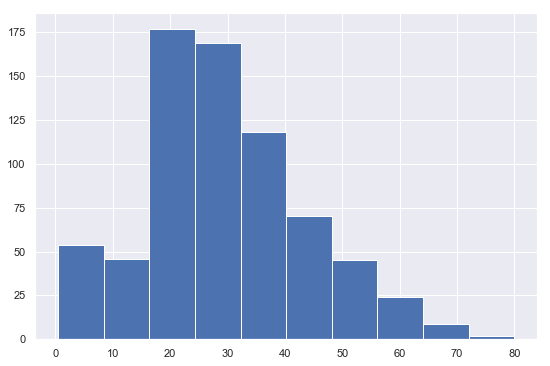

In [96]:
plt.figure(figsize=(9,6))
plt.hist(titanic.Age.dropna())

## Co to je subplot? E.g. vytvaranie viacerych grafov do jedneho velkeho "grafu"

Cely velky objekt, kde moze byt mnozstvo grafov, sa nazyva `Figure`. `Figure` ma svoje `axes` na ktore sa nanasaju jednotlive grafy (resp. subploty). Funkcia `plt.subplots` sluzi primarne na vytvorenie mriezky takychto subplotov.

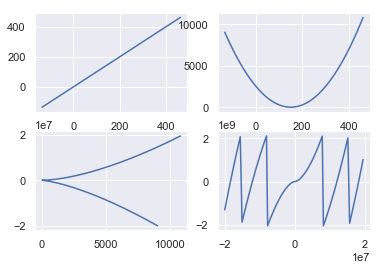

In [97]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(data.linearna,data.linearna)
ax[0,1].plot(data.linearna,data.kvadraticka)
ax[1,0].plot(data.kvadraticka,data.kubicka)
ax[1,1].plot(data.kubicka, data.polynom)

Tieto subploty mozeme skladat do jednej `Figure` aj menej cistym sposobom (lebo nehovorime dopredu ako bude vyzerat mriezka) :

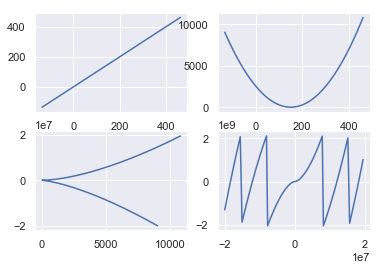

In [98]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.plot(data.linearna,data.linearna)

plt.subplot(2, 2, 2)
plt.plot(data.linearna,data.kvadraticka)

plt.subplot(2, 2, 3)
plt.plot(data.kvadraticka,data.kubicka)

plt.subplot(2, 2, 4)
plt.plot(data.kubicka, data.polynom)

## Pripajanie novych hodnot do dataframu

Ked pracujeme s dataframami, niekedy sa nam moze stat, ze potrebujeme k nasmu dataframu pridat nejaky dalsi, novy, pripadne ten nas stary rozsirit o viac hodnot, etc. Tu sa pozrieme na to ake su moznosti.

In [99]:
# vytvorim si fake dataset pre percento obezity v rokoch
ob_years=np.arange(1970,2019)
ob_perc=np.linspace(10.128,27.63,len(ob_years))
obesity=pd.DataFrame.from_dict({"year":ob_years,"percentage":ob_perc})
obesity=obesity.reindex(columns=["year","percentage"])
obesity.head(3)

,year,percentage
0,1970,10.128000
1,1971,10.492625
2,1972,10.857250


Mohol by som chciet pripojit :
- novy riadok
- novy stlpec
- novy dataframe

Tu si vzdy pred pripajanim niecoho k obesity dataframu tento dataframe skopirujem, aby som mal nad nim vacsiu kontrolu.

In [100]:
# pridam riadok na ciselnu poziciu indexu, ktory zatial neexistuje (na koniec)
obesity_cp1=obesity.copy()
obesity_cp1.loc[len(obesity_cp1)]=2200,30
obesity_cp1.tail(3)

,year,percentage
47,2017,27.265375
48,2018,27.630000
49,2200,30.000000


In [101]:
# vytvorim si novy stlpec (priemerna vaha na obyvatela), ktory budem chciet pridat k dataframu
obesity_cp2=obesity.copy()
avg_weight=np.linspace(80.5,96.7,len(obesity))

In [102]:
# jednoduchy sposob
obesity_cp2["weight"]=avg_weight
obesity_cp2.head(5)

,year,percentage,weight
0,1970,10.128000,80.5000
1,1971,10.492625,80.8375
2,1972,10.857250,81.1750
3,1973,11.221875,81.5125
4,1974,11.586500,81.8500


In [103]:
# pre funkciu concat musim najskor vytvorit pandas objekt (Series alebo DataFrame)
avg_weight_s = pd.Series(avg_weight)
avg_weight_s.name='weight'
obesity_cp3=pd.concat([obesity,avg_weight_s],axis='columns')
obesity_cp3.head()

,year,percentage,weight
0,1970,10.128000,80.5000
1,1971,10.492625,80.8375
2,1972,10.857250,81.1750
3,1973,11.221875,81.5125
4,1974,11.586500,81.8500


Pri funkcii `pd.concat` si vsak treba dat pozor na to aby data mali spravny index ( v zavislosti od toho co sa snazime urobit samozrejme). Teraz pre obezitu zmenim index.

In [104]:
obesity_cp4=obesity.copy()
obesity_cp4.index=range(80,80+49) #list(map(lambda x: str(x),list(obesity.index)))

In [105]:
obesity_cp4.head(3)

,year,percentage
80,1970,10.128000
81,1971,10.492625
82,1972,10.857250


In [106]:
pd.concat([obesity_cp4,avg_weight_s],axis='columns')

,year,percentage,weight
0,NaN,NaN,80.5000
1,NaN,NaN,80.8375
2,NaN,NaN,81.1750
3,NaN,NaN,81.5125
4,NaN,NaN,81.8500
5,NaN,NaN,82.1875
6,NaN,NaN,82.5250
7,NaN,NaN,82.8625
8,NaN,NaN,83.2000
9,NaN,NaN,83.5375


Kvoli tomu ze moj `DataFrame` a moj `Series`, ktore sa snazim spojit dokopy (pridat do dataframu ako stlpec) nemaju rovnaky index, nepodari sa mi spravit to co som potreboval. Preto pri spajani takychto dvoch objektov s rozdielnym indexom je asi najlepsie index resetnut na uplne zakladny integer index. Ak budu mat objekty rovnaky pocet prvkov, budu mat aj rovnaky index.

In [107]:
pd.concat([obesity_cp4.reset_index(drop=True),avg_weight_s.reset_index(drop=True)],axis='columns').head(5)

,year,percentage,weight
0,1970,10.128000,80.5000
1,1971,10.492625,80.8375
2,1972,10.857250,81.1750
3,1973,11.221875,81.5125
4,1974,11.586500,81.8500


#### Mohol by som potrebovat aj k existujucemu `DataFramu` pridat dalsi ktory obsahuje dalsie hodnoty. Vtedy tiez mozeme pouzit concat.

In [108]:
ob_years=np.arange(2019,2100)
ob_perc=np.linspace(27.63,67.89,len(ob_years))
obesity_new=pd.DataFrame.from_dict({"year":ob_years,"percentage":ob_perc})
obesity_new=obesity_new.reindex(columns=["year","percentage"])
obesity_new.head(3)

,year,percentage
0,2019,27.63000
1,2020,28.13325
2,2021,28.63650


In [109]:
obesity_joined=pd.concat([obesity,obesity_new],axis='rows')
obesity_joined.iloc[48:55]

,year,percentage
48,2018,27.63000
0,2019,27.63000
1,2020,28.13325
2,2021,28.63650
3,2022,29.13975
4,2023,29.64300
5,2024,30.14625


Mame tu vsak problem ze pod niektorymi indexami mame teraz dva zaznamy.

In [110]:
obesity_joined.loc[[0,1]]

,year,percentage
0,1970,10.128000
0,2019,27.630000
1,1971,10.492625
1,2020,28.133250


Vyriesime to znovu napriklad resetnutim indexu.

In [111]:
obesity_joined=obesity_joined.reset_index(drop=True)
obesity_joined.loc[[0,1]]

,year,percentage
0,1970,10.128000
1,1971,10.492625


In [112]:
obesity_joined.index

RangeIndex(start=0, stop=130, step=1)

## Filtrovanie dataframu

Klasicke filtrovanie : chceme iba niektore stlpce

In [113]:
titanic[["Age","Fare"]].head(5)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


Filtrovanie riadkov na zaklade podmienky

In [114]:
titanic[titanic.Age>70].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


Filtrovanie s viacerymi podmienkami:
- "&" sa pouziva na and
- "|" sa pouziva na or

Toto samozrejme plati len pre `pandas` a `numpy` kniznicu. Klasicky python pouziva slova `and` a `or` pri skladani podmienok.

In [115]:
titanic[(titanic.Age < 50) & (titanic.Fare > 200)].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


- Na filtrovanie riadkov a stlpcov pomocou ich labelov sa pouziva funkcia `loc`
- Na filtrovanie riadkov a stlpcov pomocou celociselnych indexov sa pouziva `iloc` (=pozor tento "celociselny index" o ktorom hovorim sa nerovna dataframe indexu ! Dataframe index sa povazuje za "label" pre jednotlive riadky dataframu a preto na filtrovanie cez typicky dataframe index sa pouziva `loc`)

Najlepsie to uvidime na novom fake dataframe.

In [116]:
mesta=['Bratislava','Praha','Vieden','Budapest']
rozloha=[367,496,414,525]
poc_obyv=[550000,1259000,1700000,1759000]
mesta_df=pd.DataFrame.from_dict({"mesta":mesta,"rozloha":rozloha,"poc_obyv":poc_obyv})
mesta_df

,mesta,rozloha,poc_obyv
0,Bratislava,367,550000
1,Praha,496,1259000
2,Vieden,414,1700000
3,Budapest,525,1759000


In [117]:
mesta_df=mesta_df.set_index('mesta')
mesta_df

,rozloha,poc_obyv
mesta,,
Bratislava,367,550000
Praha,496,1259000
Vieden,414,1700000
Budapest,525,1759000


In [118]:
mesta_df.loc[["Bratislava","Praha"]]

,rozloha,poc_obyv
mesta,,
Bratislava,367,550000
Praha,496,1259000


In [119]:
mesta_df.loc[["Bratislava","Praha"],["rozloha"]]

,rozloha
mesta,
Bratislava,367
Praha,496


In [120]:
mesta_df.iloc[0:2,:]

,rozloha,poc_obyv
mesta,,
Bratislava,367,550000
Praha,496,1259000


In [121]:
mesta_df.iloc[0:2,[1]]

,poc_obyv
mesta,
Bratislava,550000
Praha,1259000


Nad indexom vytvorenym zo stringov mozeme filtrovat aj takto:

In [122]:
mesta_df["Bratislava":"Vieden"]

,rozloha,poc_obyv
mesta,,
Bratislava,367,550000
Praha,496,1259000
Vieden,414,1700000


### Filtrovanie cez zaciatok slova

Filtrovanie indexov riadkov

In [123]:
mesta_df[mesta_df.index.str.startswith('B')]

,rozloha,poc_obyv
mesta,,
Bratislava,367,550000
Budapest,525,1759000


Filtrovanie stlpcov

In [124]:
data.loc[:,data.columns.str.startswith("normal")].head(5)

,normal_1,normal_2
0,165.390546,145.255813
1,105.635156,111.126281
2,144.086040,142.719264
3,187.053827,114.591117
4,169.444108,148.882647


#### Filtrovanie stlpcov cez regex 

In [125]:
data.loc[:,data.columns.str.match(".*ka.*")].head(5)

,kvadraticka,kubicka
0,9053,-20000922
1,8864,-19406892
2,8677,-18824742
3,8492,-18254352
4,8309,-17695602
